In [1]:
using Random
using LinearAlgebra
using DataFrames             # Data tables are called "DataFrames"
using StatsPlots             # load plotting packages 
using Statistics             # basic statistical functions
using CSV  
using SparseArrays
using Pkg
using StatsBase
pyplot() 

Plots.PyPlotBackend()

In [2]:
df = CSV.read("../data/NYC_SPARCS_cancer.csv")

,Health_Service_Area,Hospital_County,Operating_Certificate_Number,Facility_ID
,String,String,Int64,Int64
1,New York City,Bronx,7000002,1165
2,New York City,Bronx,7000002,1165
3,New York City,Bronx,7000002,1165
4,New York City,Bronx,7000002,1165
5,New York City,Bronx,7000002,1165
6,New York City,Bronx,7000002,1165
7,New York City,Bronx,7000002,1165
8,New York City,Bronx,7000002,1165
9,New York City,Bronx,7000002,1165


In [3]:
#isnan(convert(Array, df))

In [4]:
#:x is a row number column
df[!,:x] = 1:size(df,1)

1:35804

In [5]:
for name in names(df)
    print(":", name, ", ")
end

:Health_Service_Area, :Hospital_County, :Operating_Certificate_Number, :Facility_ID, :Facility_Name, :Age_Group, :Zip_Code_3digits, :Gender, :Race, :Ethnicity, :Length_of_Stay, :Type_of_Admission, :Patient_Disposition, :Discharge_Year, :CCS_Diagnosis_Code, :CCS_Diagnosis_Description, :CCS_Procedure_Code, :CCS_Procedure_Description, :APR_DRG_Code, :APR_DRG_Description, :APR_MDC_Code, :APR_MDC_Description, :APR_Severity_of_Illness_Code, :APR_Severity_of_Illness_Description, :APR_Risk_of_Mortality, :APR_Medical_Surgical_Description, :Payment_Typology 1, :Payment_Typology_2, :Payment_Typology_3, :Birth_Weight, :Abortion_Edit_Indicator, :Emergency_Department_Indicator, :Total_Charges, :x, 

In [4]:
df.Length_of_Stay = replace.(df.Length_of_Stay, Ref("120 +" => "120"))
#df[df[:Length_of_Stay] .== "120 +",12] = "120"

35804-element Array{String,1}:
 "58"
 "57"
 "21"
 "25"
 "49"
 "14"
 "37"
 "8"
 "11"
 "11"
 "6"
 "13"
 "12"
 ⋮
 "5"
 "3"
 "2"
 "4"
 "6"
 "16"
 "4"
 "5"
 "9"
 "2"
 "2"
 "5"

In [5]:
#df[:Length_of_Stay] = float(df[:Length_of_Stay])
df[:Length_of_Stay] = parse.(Float64, df[:Length_of_Stay])
#data1[:Age] = map(x -> isna(x) ? NA : convert(Float64, x), data1[:Age])

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[5]:1
└ @ Core In[5]:1
┌ Warning: `setindex!(df::DataFrame, v::AbstractVector, col_ind::ColumnIndex)` is deprecated, use `begin
│     df[!, col_ind] = v
│     df
│ end` instead.
│   caller = top-level scope at In[5]:1
└ @ Core In[5]:1


35804-element Array{Float64,1}:
 58.0
 57.0
 21.0
 25.0
 49.0
 14.0
 37.0
  8.0
 11.0
 11.0
  6.0
 13.0
 12.0
  ⋮
  5.0
  3.0
  2.0
  4.0
  6.0
 16.0
  4.0
  5.0
  9.0
  2.0
  2.0
  5.0

In [28]:
parse(Float64, "122.2")

122.2

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[8]:1
└ @ Core In[8]:1


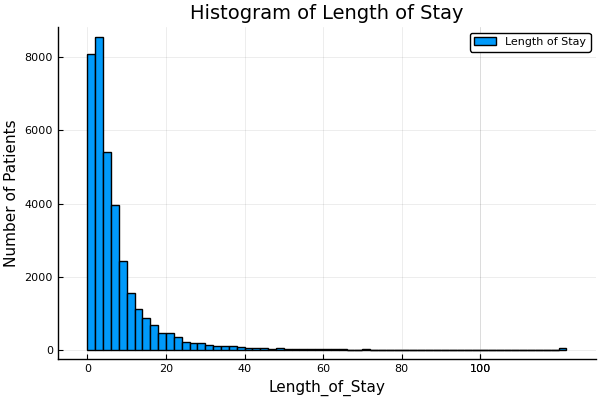

In [8]:
histogram(df[:Length_of_Stay], label="Length of Stay", bins=70)
xlabel!("Length_of_Stay")
ylabel!("Number of Patients")
title!("Histogram of Length of Stay")

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[9]:1
└ @ Core In[9]:1


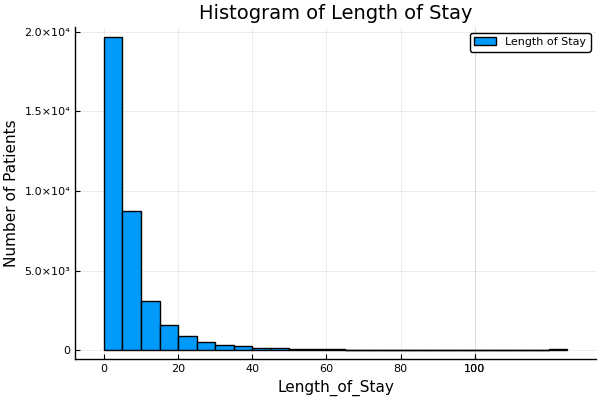

In [9]:
histogram(df[:Length_of_Stay], label="Length of Stay", bins=50)
xlabel!("Length_of_Stay")
ylabel!("Number of Patients")
title!("Histogram of Length of Stay")

In [12]:
summary(df[:Length_of_Stay])

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[12]:1
└ @ Core In[12]:1


"35804-element Array{Float64,1}"

In [13]:
describe(df[:Length_of_Stay])

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[13]:1
└ @ Core In[13]:1


Summary Stats:
Length:         35804
Missing Count:  0
Mean:           7.252988
Minimum:        1.000000
1st Quartile:   2.000000
Median:         4.000000
3rd Quartile:   8.000000
Maximum:        120.000000
Type:           Float64


# Heart Attack Linear Models.ipynb

In [1]:
model(test_set)[2]

No documentation found.

Binding `model` does not exist.


In [30]:

#function that calculates out-of-sample error
#w = parameter array fit to model
#model = function that fits a model on a dataset
#test_set = dataset being tested
function out_sample_error(w,model,test_set)
    test_size = size(test_set,1)
    model_X = (test_set)[2]
    #model_X = model(test_set)[2]
    model_output = round(model_X*w)        ##### error this line?
    model_error = 0
    for i in 1:test_size
        if test_set[:Total_Charges][i] != model_output[i]
            model_error = model_error + 1
        end
    end
    return model_error / test_size
end

#function that runs a bootstrap estimation on the training set
#model = function that fits a model on a dataset
#resample_num = number of samples
function bootstrap_estimate(model,training_data
    ;resample_num = 1000)
    w_bs = 0
    td_size = size(training_data,1)
    for i in 1:resample_num
        #randomly samples from training set
        train_sample = training_data[sample(1:td_size,round(Int,.5*td_size)), :] 
        #incrememts bootstrap parameter by parameter of new sample
        w_bs = w_bs + model(train_sample)[1]
    end
    #finds average parameter among trials
    w_bs = w_bs / resample_num
    return w_bs
end 



#function that partitions data into train and test sets,
#runs model on train and checks error on test
#model = function that fits a model on a dataset
#training_data = dataset to be partitioned and crossvalidated
#k = number of partitions 
function cross_validate(model, training_data;
    k = 5)
    error_cv = 0
    td_size = size(training_data,1)
    #size of 1 partition when they are k partitions 
    partition = round(Int,td_size / k)
    for i in 1:k
        #creates training and test sets for this iteration
        s = (i-1)*partition + 1 
        if i == k 
            f = td_size
        else
            f = i*partition
        end
        #test partition with size 1/kth of dataset
        round_test = training_data[s:f,:]
        round_train_1 = training_data[1:s-1,:]
        round_train_2 = training_data[f+1:td_size,:]
        #training partition
        round_train = [round_train_1;round_train_2]
        #w when model is run on training set
        round_w = model(round_train)[1]
        #error in w when model run on test set
        round_error = out_sample_error(round_w,model,round_test)
        error_cv = error_cv + round_error
    end
    #average error among partitions 
    error_cv = error_cv / k
    return error_cv
end


#helper function for split_data
function build_subset(index,data)
    subset = similar(data,0)
    for i in 1:length(index)
        new_row = convert(Array, data[data[:x] .== index[i],:])
        #new_row = DataArray(data[data[:x] .== index[i],:])
        push!(subset,new_row)
    end
    return subset
end 

#splits dataset into train and test sets
#splits data based on the discharge identifier column :x (integer)
#split_raio = ratio of training set size to entire dataset size
function split_data(data_set;split_ratio = .8)
    n = size(data_set,1)
    split = Int(round(split_ratio*n))
    rand_index = shuffle(data_set[:x])
    train_index = rand_index[1:split]
    test_index = rand_index[split + 1:n]
    train = build_subset(train_index,data_set)
    test = build_subset(test_index,data_set)
    return(train,test)
end

split_data (generic function with 1 method)

In [31]:
df[:Total_Charges]
#typeof(df[:Total_Charges][1])

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[31]:1
└ @ Core In[31]:1


35804-element CSV.Column{Float64,Float64}:
 216494.21
 194330.51
  79396.48
  86736.8
 178592.87
  57239.16
 111640.1
  31801.91
  38714.48
  33681.75
  20601.51
  45184.99
  37010.34
      ⋮
  92564.3
  30328.2
  23124.27
  83585.84
  83309.06
 315887.84
 119039.11
  84369.32
  99857.0
  60672.77
  35890.19
 110566.0

In [32]:
train = split_data(df)[1]
test = split_data(df)[2]

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = split_data(::DataFrame; split_ratio::Float64) at In[30]:93
└ @ Main ./In[30]:93
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = build_subset(::Array{Int64,1}, ::DataFrame) at In[30]:80
└ @ Main ./In[30]:80
┌ Warning: `convert(::Type{Array}, df::AbstractDataFrame)` is deprecated, use `convert(Matrix, df)` instead.
│   caller = build_subset(::Array{Int64,1}, ::DataFrame) at In[30]:80
└ @ Main ./In[30]:80


,Health_Service_Area,Hospital_County,Operating_Certificate_Number,Facility_ID
,String,String,Int64,Int64
1,New York City,Kings,7001033,1315
2,New York City,Kings,7001009,1294
3,New York City,Manhattan,7002002,1439
4,New York City,Manhattan,7002053,1463
5,New York City,Bronx,7000006,1169
6,New York City,Manhattan,7002020,1453
7,New York City,Manhattan,7002054,1458
8,New York City,Manhattan,7002001,1438
9,New York City,Manhattan,7002054,1458


In [33]:
#MODEL ONE: predict total charges
#conditions on severity of illness and length of stay
function model_one(training_data)
    td_size = size(training_data,1)
    X = [training_data[:APR_Severity_of_Illness_Code] training_data[:Length_of_Stay] ones(td_size)]
    y = training_data[:Total_Charges]
    #X = [training_data[:APR_Severity_of_Illness_Code].data training_data[:Length_of_Stay] ones(td_size)]
    #y = training_data[:Survived].data
    w = X\y
    return (w,X)
end 

model_one (generic function with 1 method)

In [34]:
w1 = model_one(train)[1]

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = model_one(::DataFrame) at In[33]:5
└ @ Main ./In[33]:5
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = model_one(::DataFrame) at In[33]:5
└ @ Main ./In[33]:5
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = model_one(::DataFrame) at In[33]:6
└ @ Main ./In[33]:6


3-element Array{Float64,1}:
 9311.704417417293
 4368.132452991335
 7044.165570314837

In [35]:
td_size = size(train,1)
X = [train[:APR_Severity_of_Illness_Code] train[:Length_of_Stay] ones(td_size)]
y = train[:Total_Charges]
w = X\y    # MethodError: no method matching zero(::Type{Any}) zero y val?
#return (w,X)

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[35]:2
└ @ Core In[35]:2
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[35]:2
└ @ Core In[35]:2
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[35]:3
└ @ Core In[35]:3


3-element Array{Float64,1}:
 9311.704417417293
 4368.132452991335
 7044.165570314837

In [37]:
@show cross_validate(model_one, train)

MethodError: MethodError: no method matching round(::Array{Float64,1})
Closest candidates are:
  round(!Matched::Type{BigInt}, !Matched::BigFloat) at mpfr.jl:321
  round(!Matched::Float64, !Matched::RoundingMode{:Nearest}) at float.jl:376
  round(!Matched::Float64, !Matched::RoundingMode{:Up}) at float.jl:374
  ...